# ts-explore

# Import sdk

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 60

# 时序数据

## 新冠肺炎

In [2]:
data = pd.read_csv('data/COVID-19.csv')
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True)
data.head()

,confirmed,suspected
date,,
2020-01-21,149,26
2020-01-22,131,257
2020-01-23,259,680
2020-01-24,444,1118
2020-01-25,688,1309


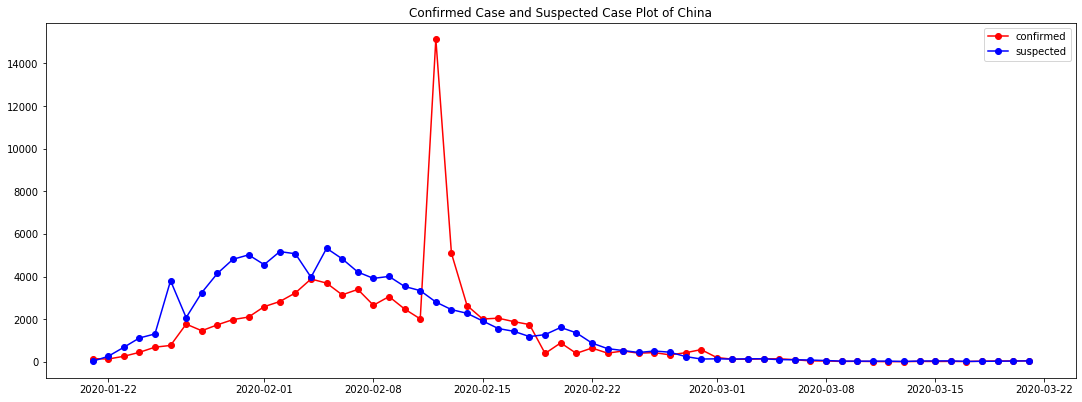

In [3]:
plt.figure(figsize=(15, 5.5))
plt.plot(data["confirmed"], color="r", linestyle='-', marker='o')
plt.plot(data["suspected"], color="b", linestyle='-', marker='o')
plt.legend(["confirmed", "suspected"])
plt.title("Confirmed Case and Suspected Case Plot of China")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

三月份肺炎情况

In [4]:
data = data[data.index >= pd.to_datetime("2020-03-04")]

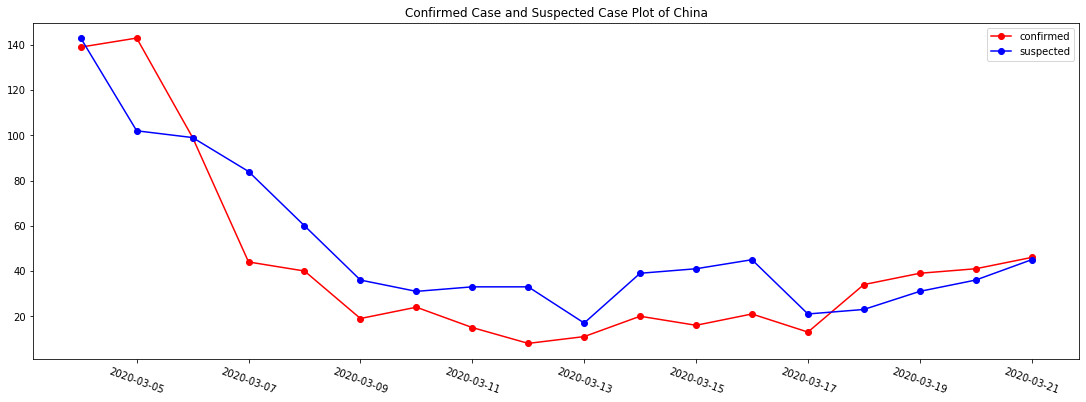

In [5]:
plt.figure(figsize=(15, 5.5))
plt.plot(data["confirmed"], color="r", linestyle='-', marker='o')
plt.plot(data["suspected"], color="b", linestyle='-', marker='o')
plt.legend(["confirmed", "suspected"])
plt.title("Confirmed Case and Suspected Case Plot of China")
plt.xticks(rotation=340)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

## 常见时间序列

### 常值序列

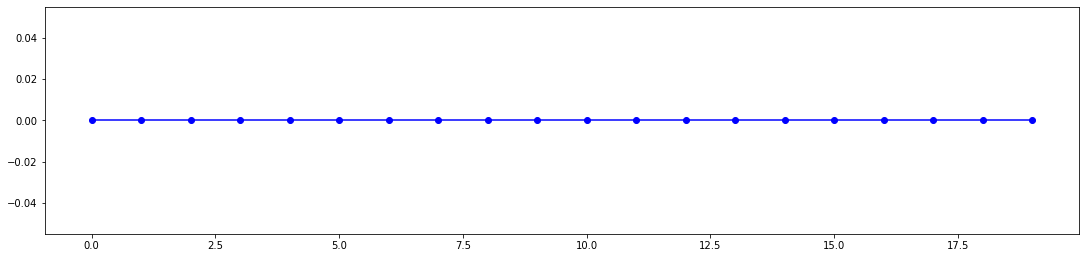

In [6]:
y = np.zeros((1,20))[0]

plt.figure(figsize=(15, 3.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

### 下降趋势

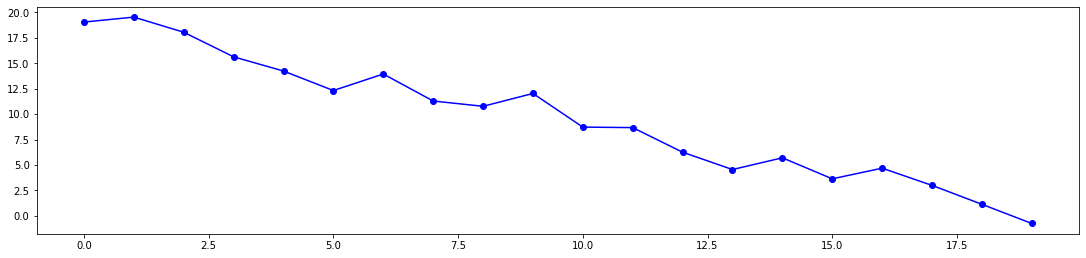

In [7]:
n=20
x=np.arange(n)
y_= x[::-1]
mu=0
sigma=1
e= np.random.normal(mu, sigma, n)
y=y_+e
plt.figure(figsize=(15,3.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

### 周期性

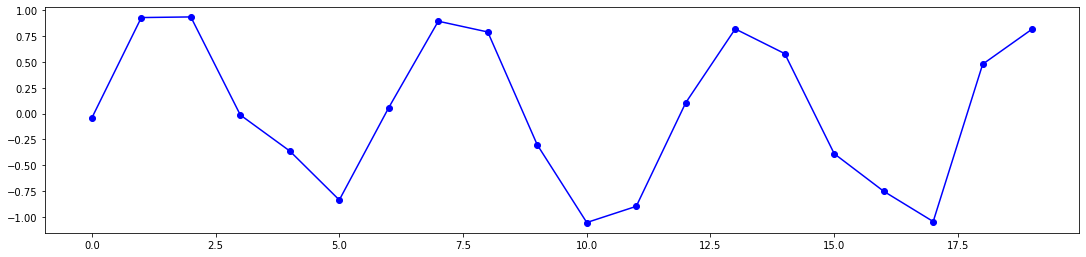

In [8]:
n=20
x=np.arange(n)
season = np.array([math.sin(i/3*math.pi) for i in x])
noise = np.random.normal(0,0.2,len(x))
y = season + noise
plt.figure(figsize=(15, 3.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

### 周期加趋势

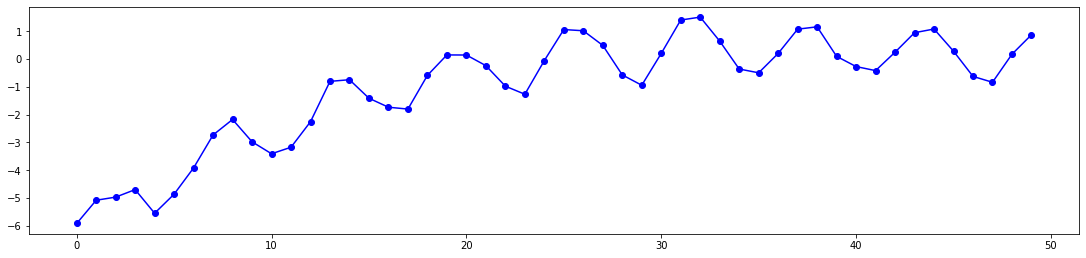

In [9]:
x = np.arange(start=0, step=0.04, stop=2)
trend = [(a-1)*(a-2)*(a-3) for a in x]
season = np.array([math.sin(i/3*math.pi) for i, _ in enumerate(x)])
noise = np.random.normal(0,0.2,len(x))
y = trend + season + noise
plt.figure(figsize=(15,3.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

### 白噪声

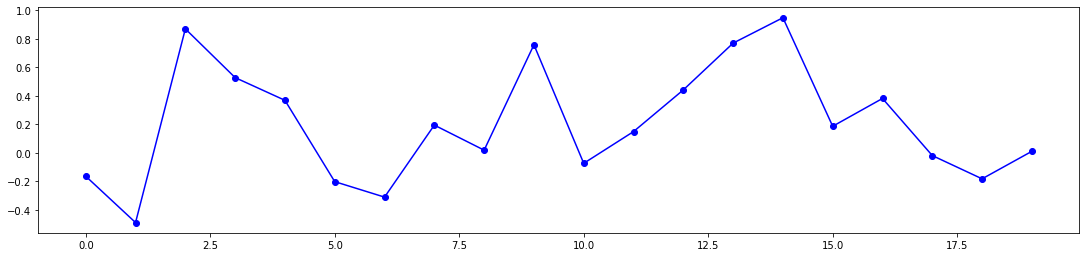

In [10]:
n=20
x=np.arange(n)
noise = np.random.normal(0, 0.5, len(x))
y = noise
plt.figure(figsize=(15, 3.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

### 其他异常

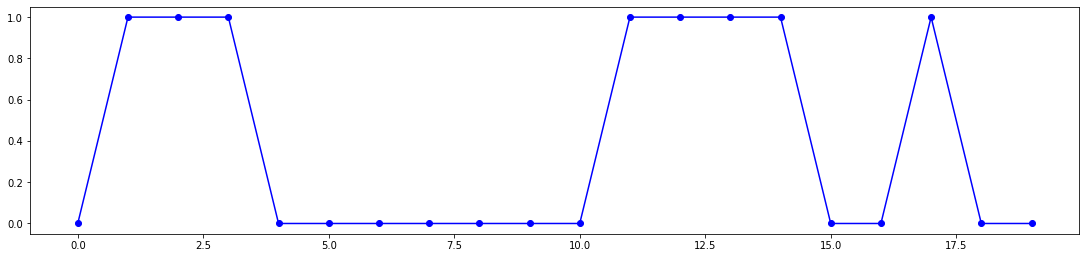

In [11]:
np.random.seed(20)
n=20
rr = np.random.random(20) 
y =  rr > 0.7
plt.figure(figsize=(15, 3.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

# 时序分类

## 平稳过程

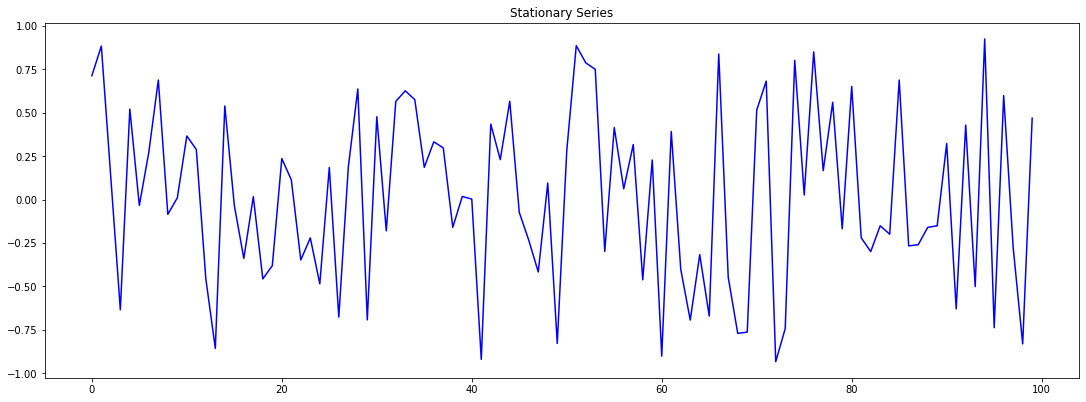

In [12]:
n = 100
x=np.arange(n)
y_=np.random.uniform(-1,1,[n])

mu=0
sigma=0.01
e= np.random.normal(mu, sigma, n)
#stationary series
y=y_+e

plt.figure(figsize=(15, 5.5))
plt.plot(x,y, color="b", linestyle='-')
plt.title("Stationary Series")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

## 非平稳过程

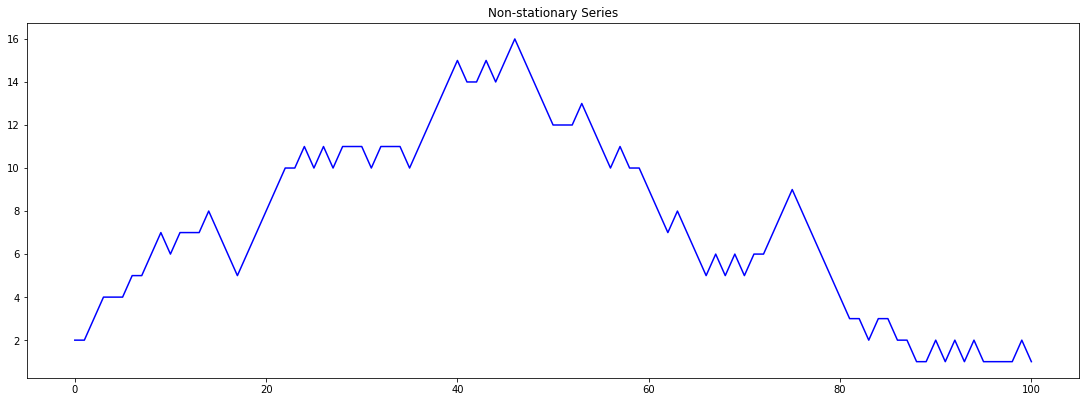

In [13]:
# Probability to move up or down 
prob = [0.4, 0.6]   
  
# statically defining the starting position 
start = 2  
positions = [start] 
  
# creating the random points 
np.random.seed(0)
rr = np.random.random(100) 
downp = rr < prob[0] 
upp = rr > prob[1] 

for idownp, iupp in zip(downp, upp): 
    down = idownp and positions[-1] > 1
    up = iupp and positions[-1] < 100
    positions.append(positions[-1] - down + up) 
  
# plotting down the graph of the random walk in 1D 
plt.figure(figsize=(15, 5.5))
plt.plot(positions, color="b", linestyle='-') 
plt.title("Non-stationary Series")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

# 时序分解算法

## 可加和可乘模型

### 可加模型

In [14]:
from math import exp, sin, pi

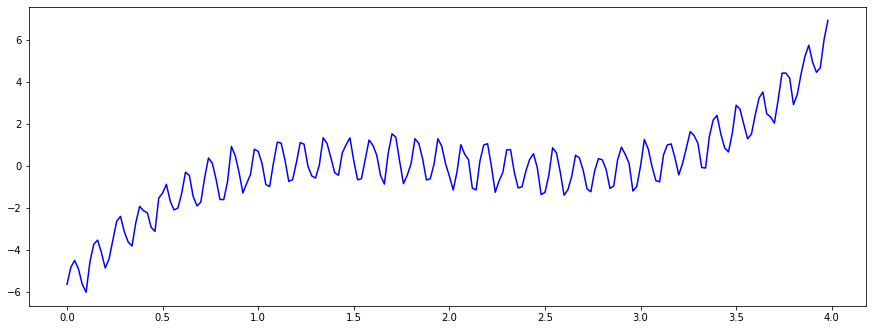

In [15]:
np.random.seed(0)
x = np.arange(start=0, step=0.02, stop=4)
trend = np.array([(a-1)*(a-2)*(a-3) for a in x])
season = np.array([sin(i/3*pi) for i, _ in enumerate(x)])
noise = np.random.normal(0,0.2,len(x))
y = trend + season + noise
plt.figure(figsize=(15,5.5))
pd.Series(data=y, index=x).plot(color='b', linestyle='-')

### 可乘模型

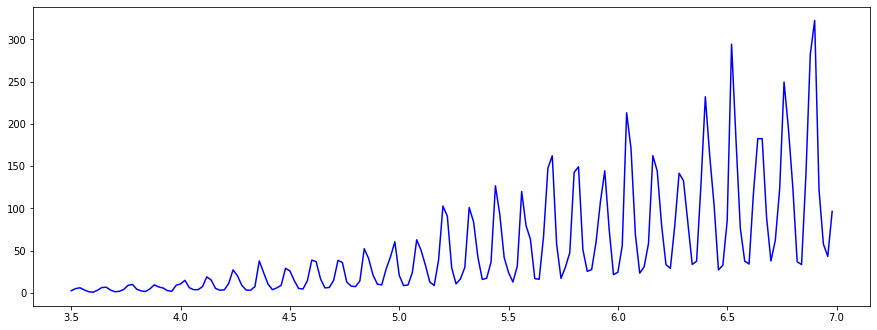

In [16]:
np.random.seed(0)
x = np.arange(start=3.5, step=0.02, stop=7)
trend = np.array([(a-1)*(a-2)*(a-3) for a in x])
season = np.array([sin(i/3*pi) for i, _ in enumerate(x)])
noise = np.random.normal(0,0.2,len(x))
season = np.array([exp(i) for i in season])
noise = np.array([exp(e) for e in noise])
y = trend*season*noise
plt.figure(figsize=(15,5.5))
pd.Series(data=y, index=x).plot(color='b', linestyle='-')

## 经典分解算法

### 只有趋势

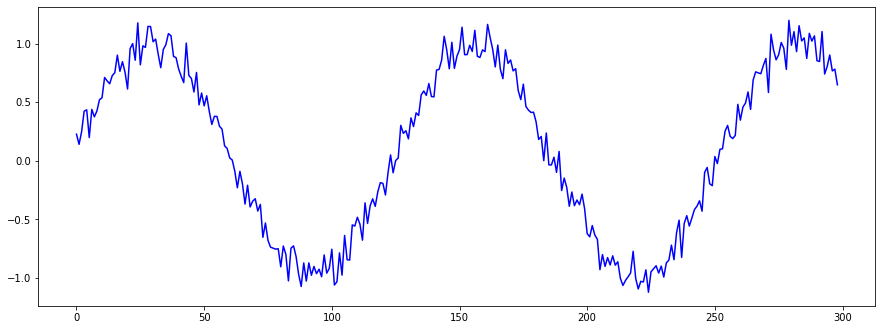

In [17]:
np.random.seed(0)
x = np.arange(start=1,  stop=300)
trend = [math.sin(i/20) for i in x]
noise = np.random.normal(0,0.1,len(x))
y = trend + noise
plt.figure(figsize=(15, 5.5))
plt.plot(y, color="b")

In [18]:
# decompose + plot
from statsmodels.tsa import seasonal
decompose_model = seasonal.seasonal_decompose(y, freq=12, model='additive')

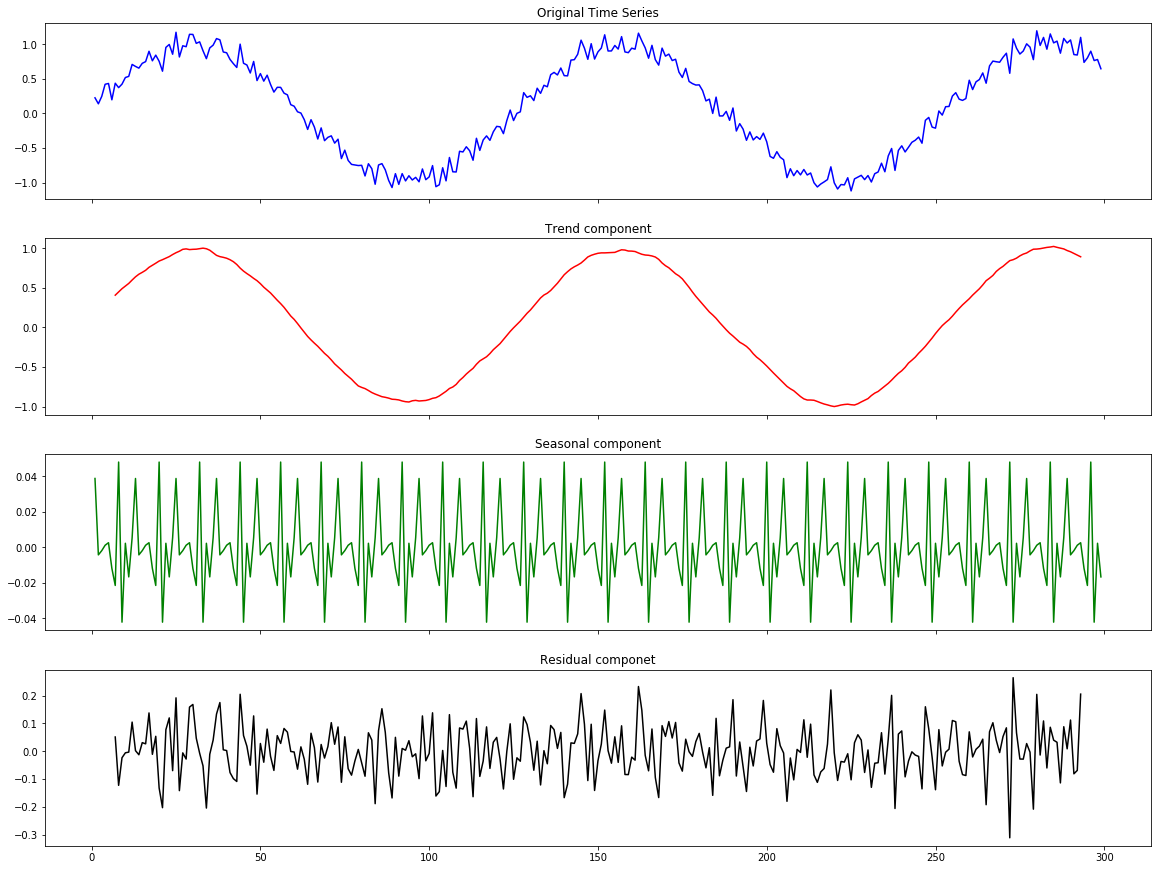

In [19]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(16, 12)

pd.Series(data=y, index=x).plot(ax=axarr[0], color="b", linestyle='-')
axarr[0].set_title("Original Time Series")

pd.Series(data=decompose_model.trend, index=x).plot(ax=axarr[1], color="r", linestyle='-')
axarr[1].set_title("Trend component")

pd.Series(data=decompose_model.seasonal, index=x).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title("Seasonal component")

pd.Series(data=decompose_model.resid, index=x).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title("Residual componet")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

### 趋势+周期

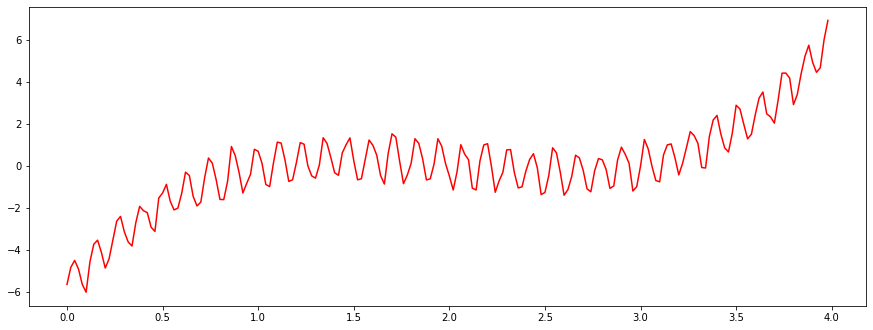

In [20]:
# generate data
np.random.seed(0)
x = np.arange(start=0, step=0.02, stop=4)
trend = [(a-1)*(a-2)*(a-3) for a in x]
season = np.array([math.sin(i/3*math.pi) for i, _ in enumerate(x)])
noise = np.random.normal(0,0.2,len(x))
y = trend + season + noise
plt.figure(figsize=(15,5.5))
pd.Series(data=y, index=x).plot(color='r', linestyle='-')

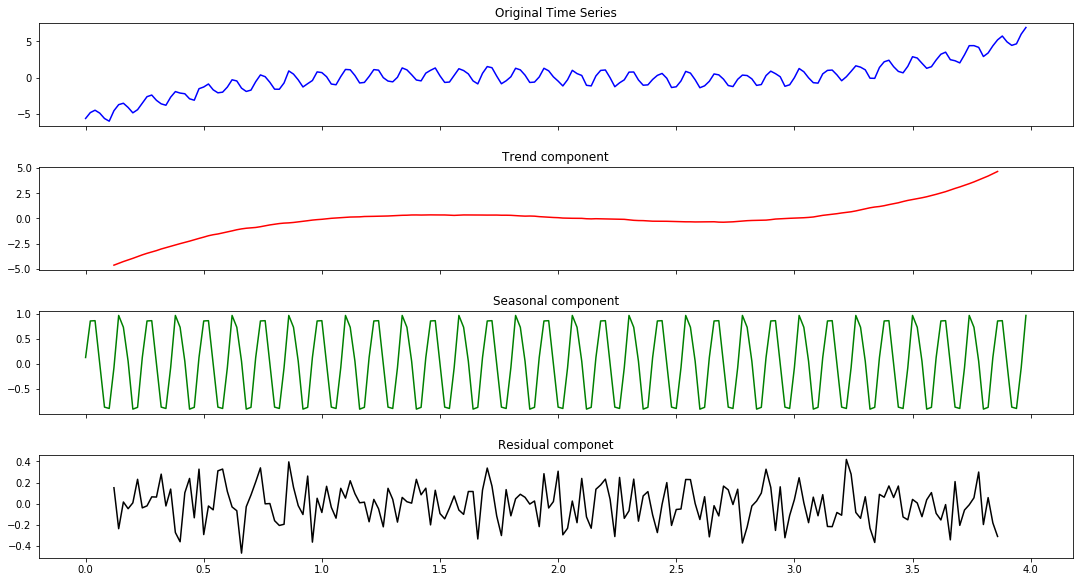

In [21]:
# decompose + plot
decompose_model = seasonal.seasonal_decompose(y, freq=12,
                                              model='additive')
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(15, 8)

pd.Series(data=y, index=x).plot(ax=axarr[0], color="b", linestyle='-')
axarr[0].set_title("Original Time Series")

pd.Series(data=decompose_model.trend, index=x).plot(ax=axarr[1], color="r", linestyle='-')
axarr[1].set_title("Trend component")

pd.Series(data=decompose_model.seasonal, index=x).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title("Seasonal component")

pd.Series(data=decompose_model.resid, index=x).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title("Residual componet")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

### 变周期

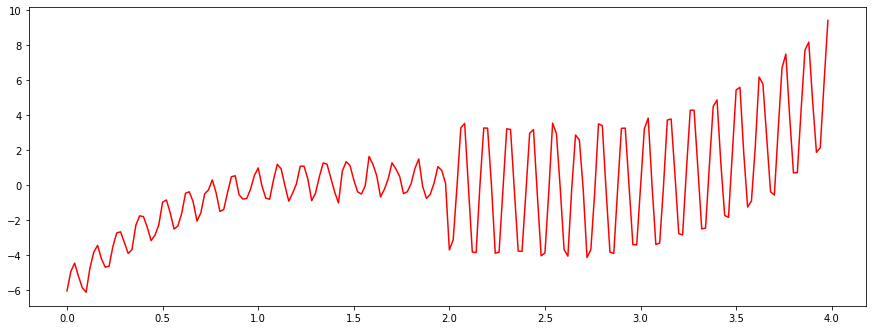

In [22]:
# generate data
x = np.arange(start=0, step=0.02, stop=4)
trend = [(a-1)*(a-2)*(a-3) for a in x]
season1 = np.array([math.sin(i/3*math.pi) for i, _ in enumerate(x)])
season2 = np.array([4*math.sin(i/3*math.pi) for i, _ in enumerate(x)])
m = math.floor(len(x)/2)
season = np.append(season1[0:m], season2[m:])
noise = np.random.normal(0,0.2,len(x))
y = trend + season + noise
plt.figure(figsize=(15, 5.5))
pd.Series(data=y, index=x).plot(color='r', linestyle='-')

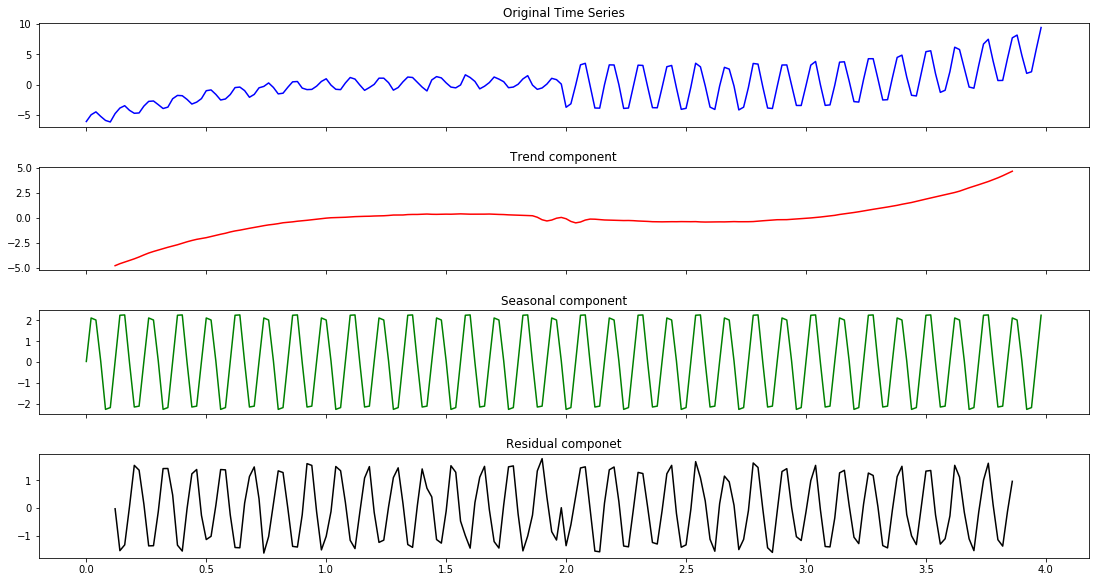

In [23]:
# decompose + plot
decompose_model = seasonal.seasonal_decompose(y, freq=12,
                                              model='additive')
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(15, 8)

pd.Series(data=y, index=x).plot(ax=axarr[0], color="b", linestyle='-')
axarr[0].set_title("Original Time Series")

pd.Series(data=decompose_model.trend, index=x).plot(ax=axarr[1], color="r", linestyle='-')
axarr[1].set_title("Trend component")

pd.Series(data=decompose_model.seasonal, index=x).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title("Seasonal component")

pd.Series(data=decompose_model.resid, index=x).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title("Residual componet")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

## Holt-Winters 分解法

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing

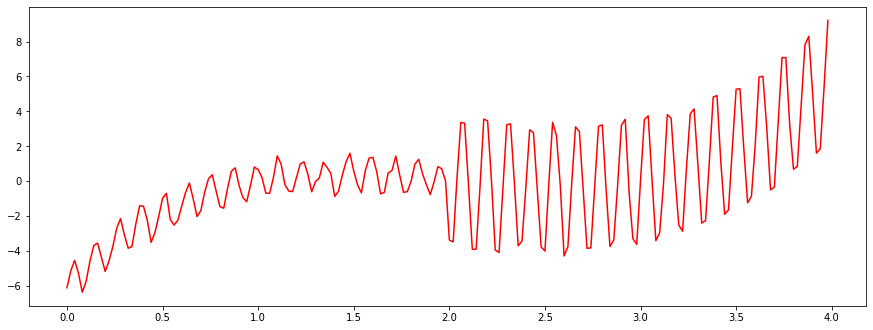

In [25]:
# generate data
x = np.arange(start=0, step=0.02, stop=4)
trend = [(a-1)*(a-2)*(a-3) for a in x]
season1 = np.array([math.sin(i/3*math.pi) for i, _ in enumerate(x)])
season2 = np.array([4*math.sin(i/3*math.pi) for i, _ in enumerate(x)])
m = math.floor(len(x)/2)
season = np.append(season1[0:m], season2[m:])
noise = np.random.normal(0,0.2,len(x))
y = trend + season + noise
plt.figure(figsize=(15, 5.5))
pd.Series(data=y, index=x).plot(color='r', linestyle='-')

In [26]:
fit = ExponentialSmoothing(y, seasonal_periods=6, trend='add', seasonal='add', damped=False).fit(use_boxcox=False)

C:\Users\z\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


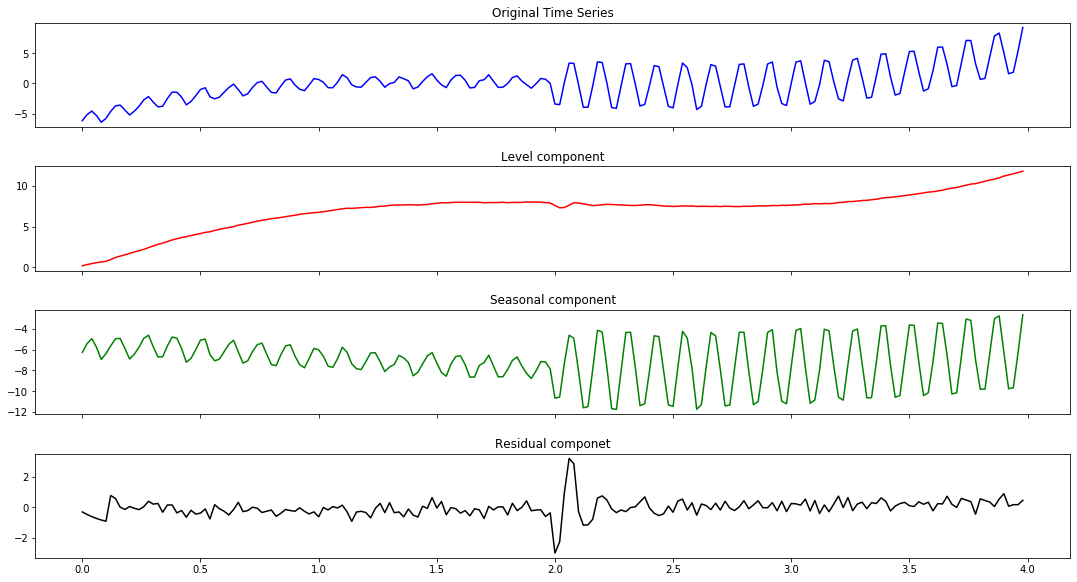

In [27]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(15, 8)

pd.Series(data=y, index=x).plot(ax=axarr[0], color="b", linestyle='-')
axarr[0].set_title("Original Time Series")

pd.Series(data=fit.level, index=x).plot(ax=axarr[1], color="r", linestyle='-')
axarr[1].set_title("Level component")

pd.Series(data=fit.season, index=x).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title("Seasonal component")

pd.Series(data=fit.resid, index=x).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title("Residual componet")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

## STL 分解法

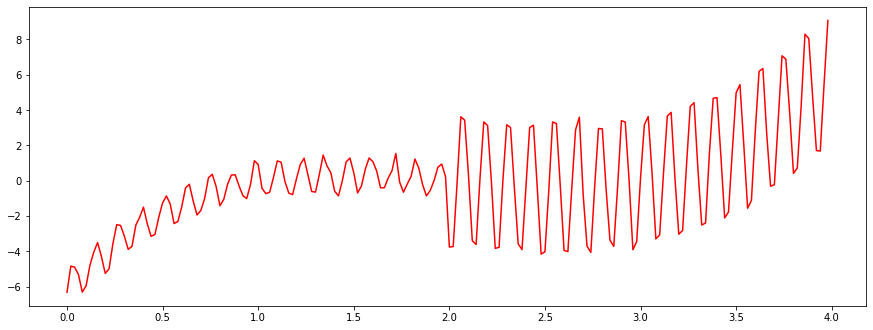

In [28]:
# generate data
x = np.arange(start=0, step=0.02, stop=4)
trend = [(a-1)*(a-2)*(a-3) for a in x]
season1 = np.array([math.sin(i/3*math.pi) for i, _ in enumerate(x)])
season2 = np.array([4*math.sin(i/3*math.pi) for i, _ in enumerate(x)])
m = math.floor(len(x)/2)
season = np.append(season1[0:m], season2[m:])
noise = np.random.normal(0,0.2,len(x))
y = trend + season + noise
plt.figure(figsize=(15,5.5))
pd.Series(data=y, index=x).plot(color='r', linestyle='-')

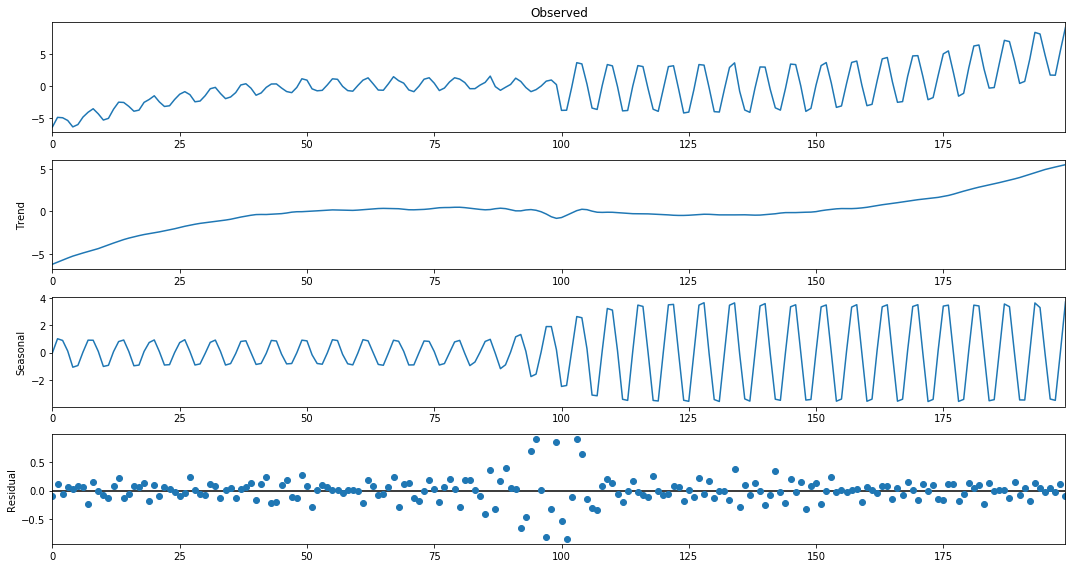

In [29]:
from statsmodels.tsa.seasonal import STL
stl = STL(y, period=6)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(15, 8)
fig.set_tight_layout(True)

In [30]:
# !pip install --upgrade statsmodels

# 异常规则

## n-sigma 准则

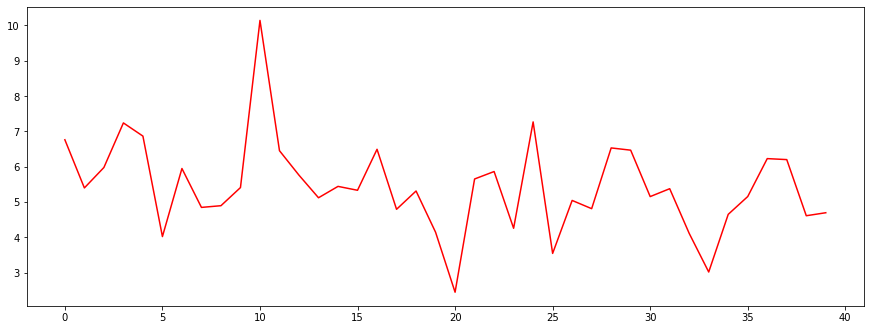

In [31]:
# generate data
np.random.seed(0)
x = np.arange(40)
y = np.random.normal(5, 1,len(x))
y[10] = y[10] + 5
plt.figure(figsize=(15,5.5))
pd.Series(data=y, index=x).plot(color='r', linestyle='-')

In [32]:
y_mean = y.mean()
y_sigma = y.std()
y_resid = y - y_mean
print("Mean:{:.2f}".format(y_mean))
print("Std:{:.2f}".format(y_sigma))

Mean:5.44
Std:1.30


In [33]:
n = 3
up_threshold = n * y_sigma
down_threshold = - n*y_sigma
outlier_index = [i for i, res in enumerate(y_resid) if res > up_threshold or res < down_threshold]
outlier_index

[10]

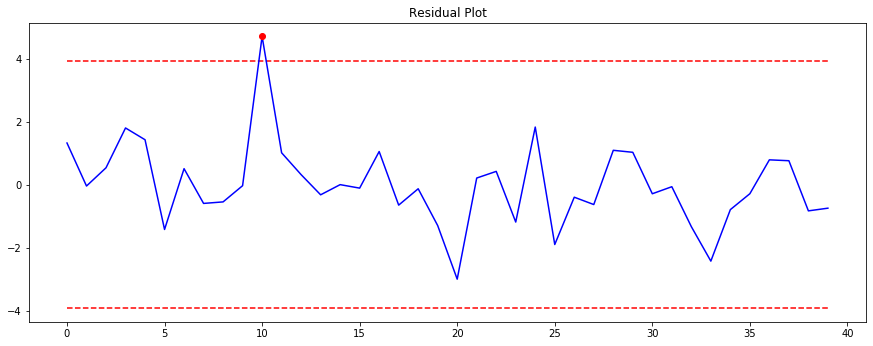

In [34]:
plt.figure(figsize=(15,5.5))
pd.Series(data=y_resid, index=x).plot(color='b', linestyle='-')
plt.title("Residual Plot")
outlier_index = [i for i, res in enumerate(y_resid) if res > up_threshold or res < down_threshold]
y_outlier = y_resid[outlier_index]
plt.plot(outlier_index, y_outlier, "ro", label="point")
plt.hlines(up_threshold, x[0], x[-1], colors="r", linestyles="dashed")
plt.hlines(down_threshold, x[0], x[-1], colors="r", linestyles="dashed")

In [35]:
def n_sigma(y, x=None, n=3):
    y_mean = y.mean()
    y_sigma = y.std()
    y_resid = y - y_mean
    print("Mean:{:.2f}".format(y_mean))
    print("Std:{:.2f}".format(y_sigma))
    up_threshold = n * y_sigma
    down_threshold = - n*y_sigma
    outlier_index = [i for i, res in enumerate(y_resid) if res > up_threshold or res < down_threshold]
    outlier_value = y[outlier_index]
    return outlier_index, outlier_value
    

## box-plot 准确

In [36]:
q1 = np.percentile(y_resid, 25)
q3 = np.percentile(y_resid, 75)
iqr = q3 - q1
up_threshold = q3 + 1.5 * iqr
down_threshold = q1 - 1.5 * iqr

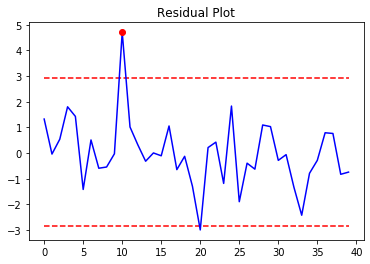

In [37]:
pd.Series(data=y_resid, index=x).plot(color='b', linestyle='-')
plt.title("Residual Plot")

y_outlier = y_resid[outlier_index]
plt.plot(outlier_index, y_outlier, "ro", label="point")
plt.hlines(up_threshold, x[0], x[-1], colors="r", linestyles="dashed")
plt.hlines(down_threshold, x[0], x[-1], colors="r", linestyles="dashed")

# 基于时序分解的异常检测算法

生成数据

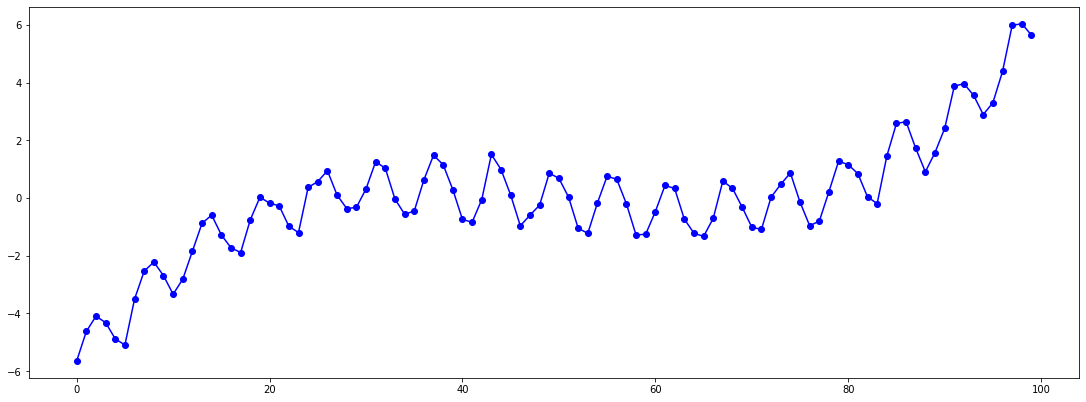

In [38]:
np.random.seed(0)
x = np.arange(start=0, step=0.04, stop=4)
trend = [(a-1)*(a-2)*(a-3) for a in x]
season = np.array([math.sin(i/3*math.pi) for i, _ in enumerate(x)])
noise = np.random.normal(0,0.2,len(x))
y = trend + season + noise
plt.figure(figsize=(15, 5.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

增加异常点

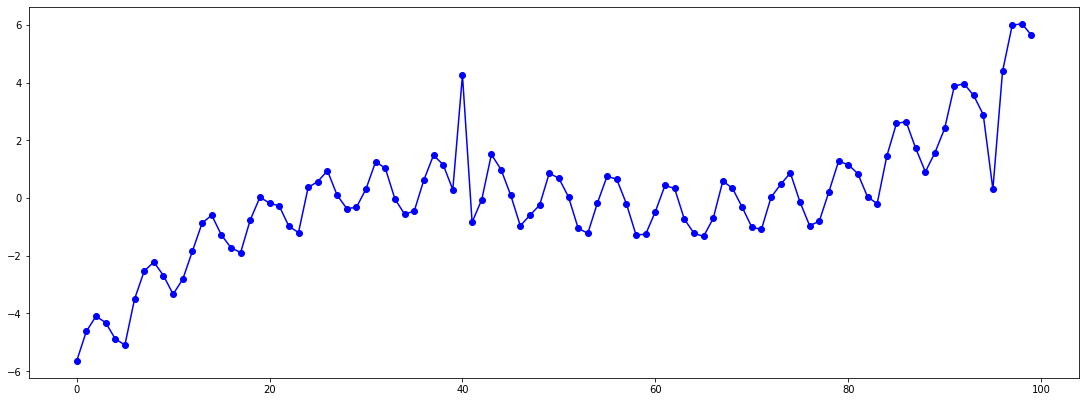

In [39]:
y[40] = y[40] + 5
y[-5] = y[-5] -3
plt.figure(figsize=(15, 5.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

异常检测

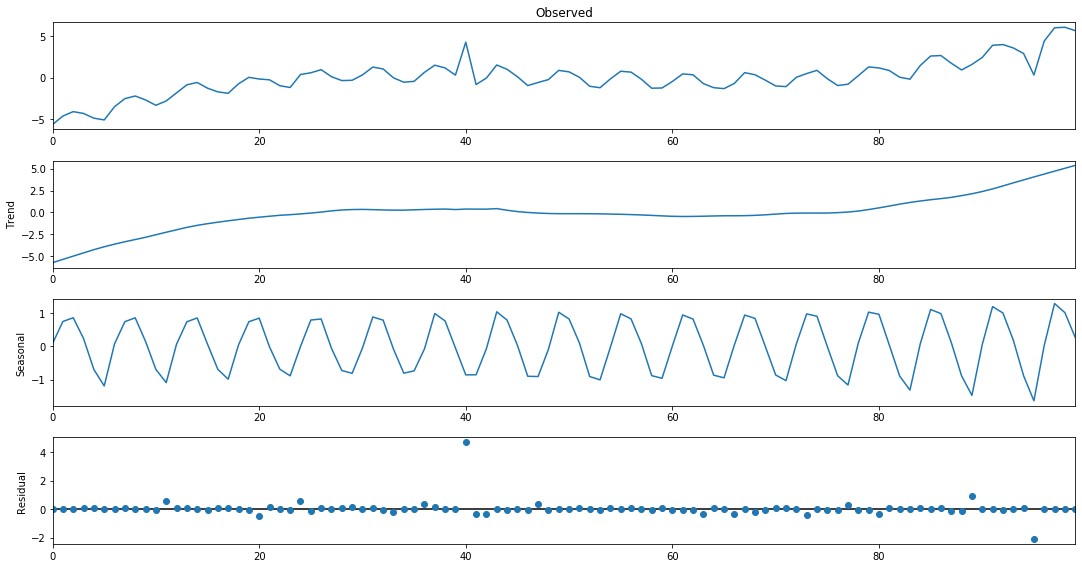

In [40]:
from statsmodels.tsa.seasonal import STL
stl = STL(y, period=6, robust=True)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(15, 8)
fig.set_tight_layout(True)

In [41]:
resid =  res.resid
outlier_index, outlier_value = n_sigma(resid)

Mean:0.03
Std:0.55


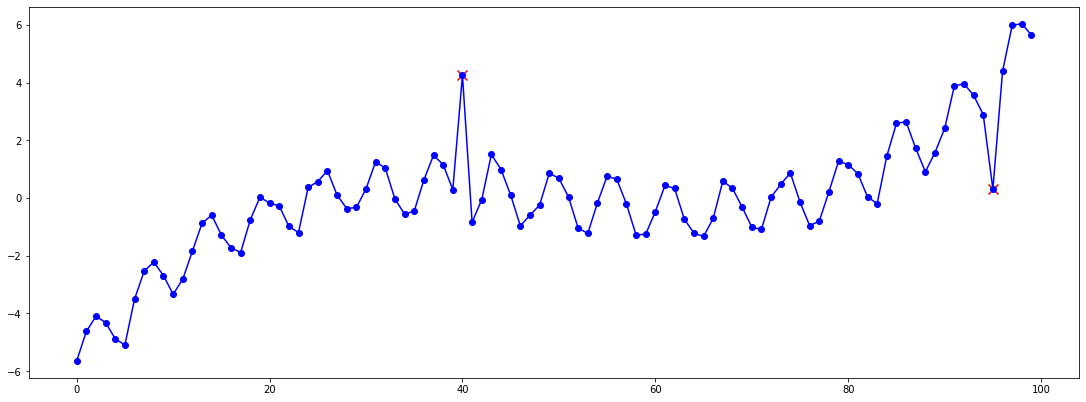

In [42]:
plt.figure(figsize=(15, 5.5))
plt.plot(y, color="b", marker='o')
plt.scatter(outlier_index, y[outlier_index], alpha = 1,  marker="x", c="r", s = 100)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)